<a href="https://colab.research.google.com/github/HariCodesThings/Data-Science-Final-Project/blob/master/Final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# NOTE:
# US_coronavirus.csv is the file with the data of US starting from Jan 21
# chinese_cities_cleaned.csv is the file with all the Chinese cities from the latest api call (latest=1)
# coronavirus_latest_raw is the raw file of api call from latest=1 endpoint
# coronavirus_raw is the file containing all entries from Jan 21
# covid_by_country_filtered.csv is the file from latest=1 endpoint grouped by country name


In [0]:
from IPython.display import Image

##Analyzing the spread of Coronavirus globally and estimating the spread within the United States

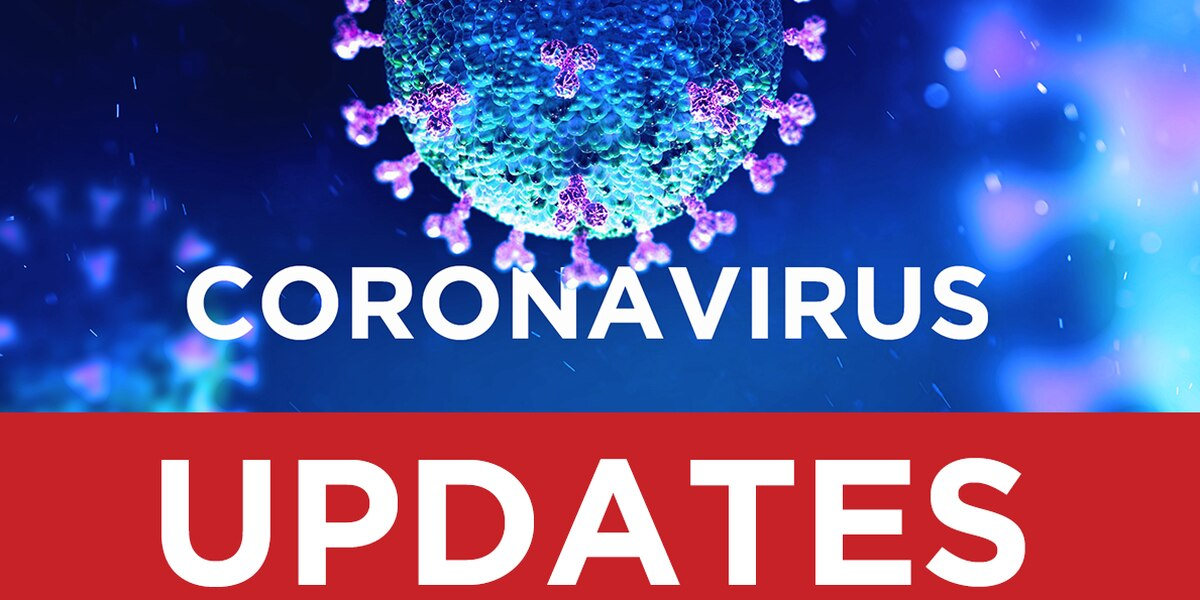

In [0]:
#some sort of images
Image("covid.jpg", width=1000)

###**Research Question:**



* Can we accurately predict or model the spread of Coronavirus within the United States from the trends seen in China? How much utility do number of confirmed cases have in predicting death counts?


###**Step 1: Getting Data**

*   COVID-19 infection API in realtime around the world (https://lab.isaaclin.cn/nCoV/en)
*   Geocoding API  for latitudes and longitudes (OpenCageGeocode)





In [0]:
import pandas as pd

df_coronavirus_full = pd.read_csv("coronavirus_raw.csv")
df_coronavirus_full.head(2)

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName
0,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,NaN,NaN,NaN,NaN
1,美属维尔京群岛,2.0,2,0.0,0,0,NaN,chend,0,USVI,United States Virgin Islands,北美洲,美属维尔京群岛,美属维尔京群岛,North America,NaN,NaN,1584487275191,NaN,NaN,NaN,NaN,NaN


In [0]:
df_coronavirus_latest = pd.read_csv("coronavirus_latest_raw.csv")
df_coronavirus_latest.head(2)

,locationId,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceShortName,provinceEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,cities,comment,updateTime
0,0,北美洲,North America,关岛,Guam,关岛,关岛,Guam,3,3,0,0,0,[],NaN,1584487275191
1,0,北美洲,North America,美属维尔京群岛,NaN,美属维尔京群岛,美属维尔京群岛,NaN,2,2,0,0,0,[],NaN,1584487275191


To get the latitude and longitude of each city in China, we used a geocoding API to find the coordinates by searching the coordinated based of off city name and country name.

In [0]:
df_cities = pd.read_csv("chinese_cities_cleaned.csv")
df_cities[['cityEnglishName','provinceName','countryName','lat','long']].head()

,cityEnglishName,provinceName,countryName,lat,long
0,Dandong,Liaoning,China,40.128668,124.386340
1,Shenyang,Liaoning,China,41.804109,123.427636
2,Chaoyang,Liaoning,China,41.575477,120.439074
3,Dalian,Liaoning,China,38.918171,121.628295
4,Jinzhou,Liaoning,China,41.108528,121.119422


###**Step 2: Data Cleaning**

Filtering:
*   Converted the updateTime column in df_coronavirus_full to a date. Otherwise, the numbers are confusing and hard to interpret.
*   Filtered the cities column and replaced None or Nan to an empty array for parsing purposes.
*   Filtered df_cities by removing rows that do not have a cityEnglishName and added latitude and longitude columns from the geoencoding api.

_Quantitative Data_

*   confirmedCount: total confirmed count
*   curedCount: total cured count
*   deadCount: total death count






In [0]:
df_US = pd.read_csv("US_coronavirus.csv")
df_US[['countryEnglishName','cities','confirmedCount',
       'curedCount','deadCount','updateTime',
       'updateTime_cleaned']].head(2)

,countryEnglishName,cities,confirmedCount,curedCount,deadCount,updateTime,updateTime_cleaned
0,United States of America,[],5709,74,97,1584476307899,03/17/20
1,United States of America,[],5709,74,97,1584470183217,03/17/20


In [0]:
df_coronavirus_cleaned = pd.read_csv("covid_by_country_filtered.csv")
df_coronavirus_cleaned.head(2)

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
0,Afghanistan,22,22,0,0,0
1,Albania,54,55,0,0,1


In [0]:
df_cities[['cityEnglishName','countryName','confirmedCount',
           'curedCount','deadCount','lat','long']].head(2)

,cityEnglishName,countryName,confirmedCount,curedCount,deadCount,lat,long
0,Dandong,China,11,9,0,40.128668,124.386340
1,Shenyang,China,28,27,0,41.804109,123.427636


###**Step 3: Exploring the Data**

Here is an overview of global confirmed cases graphed on an Altair interactive graph. If you hover over each country, you can see the confirmed cases, curent count, and death count.

In [0]:
from altair import *
df_high_confirmed_countries = pd.read_csv('high_confirmed.csv')
chart_by_conf = Chart(df_high_confirmed_countries).mark_bar().encode(
                  x='countryEnglishName',
                  y= 'confirmedCount',
                  color = 'countryEnglishName',
                  tooltip=['countryEnglishName', 'confirmedCount', 'curedCount', 'deadCount'])

chart_by_conf.title = "COVID-19 Case Overview (Global)"
chart_by_conf.interactive()

alt.Chart(...)

Below is a time series graph of the number of COVID-19 confirmed cases around the world beginning from January 21, 2020. We can see that the general trend is upwards. Not to mention, the number of cases is still increasing as countries such as Italy and US continue to find more people testing positive for COVID-19.

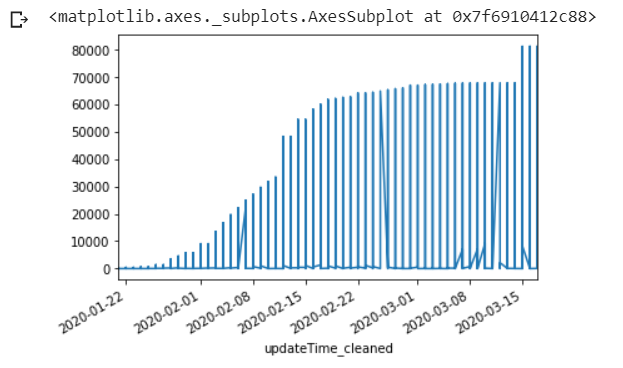

In [0]:
Image("overall_covid.png", width=700)

Let's examine the confirmed cases in US compared to Italy and Hubei (the two very high risk areas). As you can see US and Italy has a similar trend because both countries are still at the early stages of COVID-19. If you look at the graph of Hubei, you can see that they are starting to plateau. However, the graph still shows the upward trend on the Hubei graph starting from 2020-01-22 to 2020-02-10.

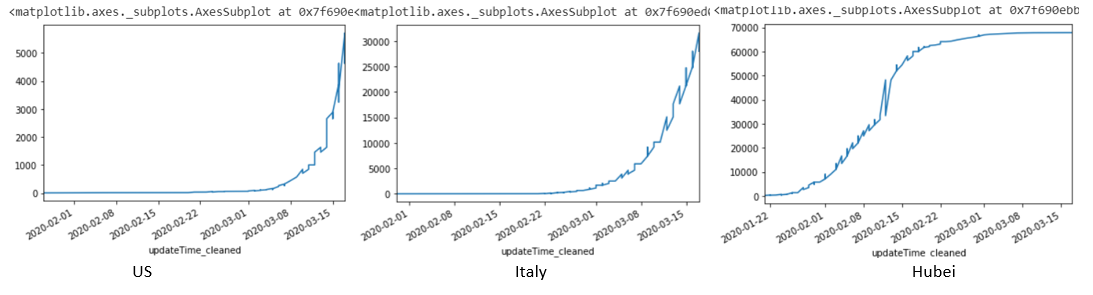

In [0]:
Image("confirmed_count_UIH.png")

Here we are looking at the cured counts and we can see that US is dealing with the situation better than Italy because if you look at the graph for Italy, they have only recently began to have cured cases, whereas, US already have a few cured cases within the first week. 

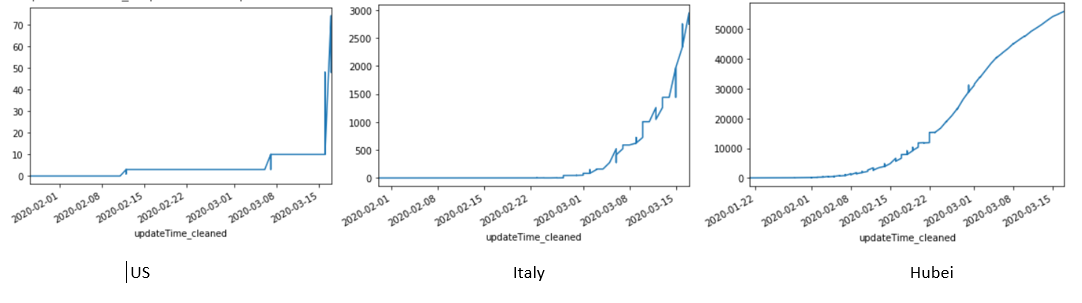

In [0]:
Image("cured_UIH.png")

Lastly, let's also examine the death count for each of these areas. Here again, much like the confirmed case graphs, US and Italy are both in the earlier stages of COVID-19 and are experiencing exponential death counts. Whereas, in Hubei, it has starting to plateaued. This makes sense because less people are being infected by COVID-19.


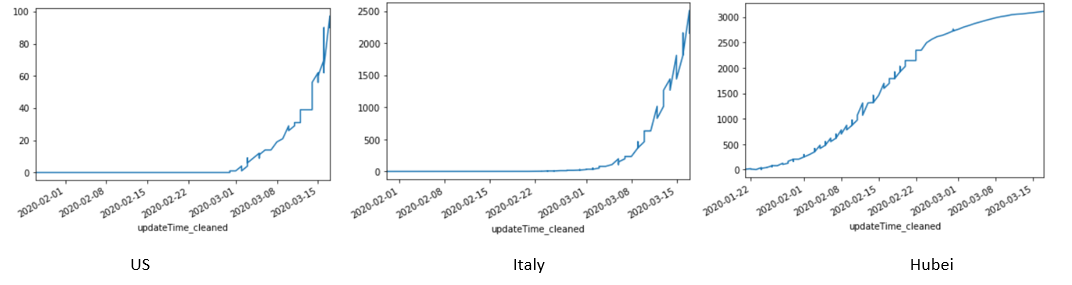

In [0]:
Image("death_UIH.png")

An interesting result we found during our data exploration is that, as medically advanced as US, the US actually have the highest confirmed to death ratio.

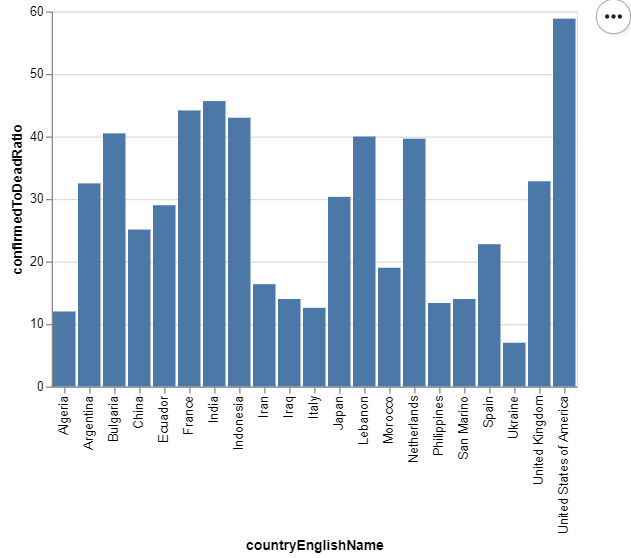

In [0]:
Image("confirmedtodeath.png")

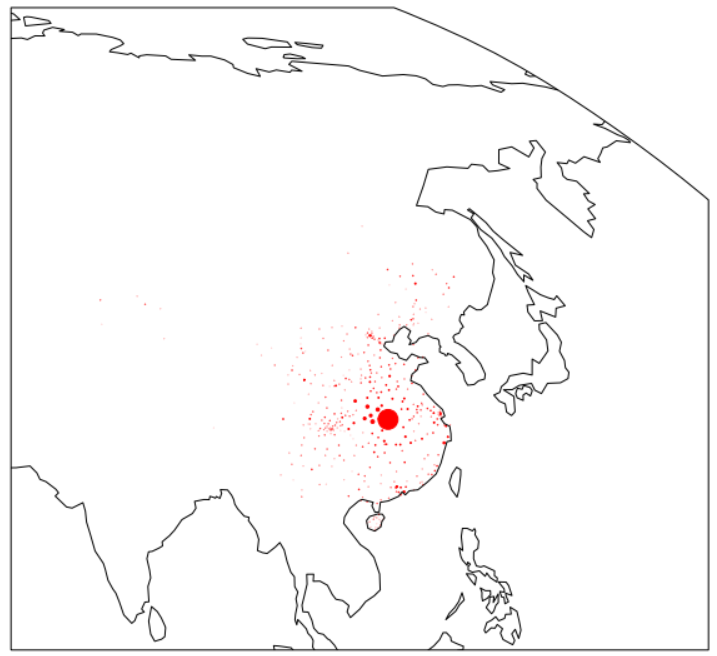

In [0]:
Image("confirmed_count.png")

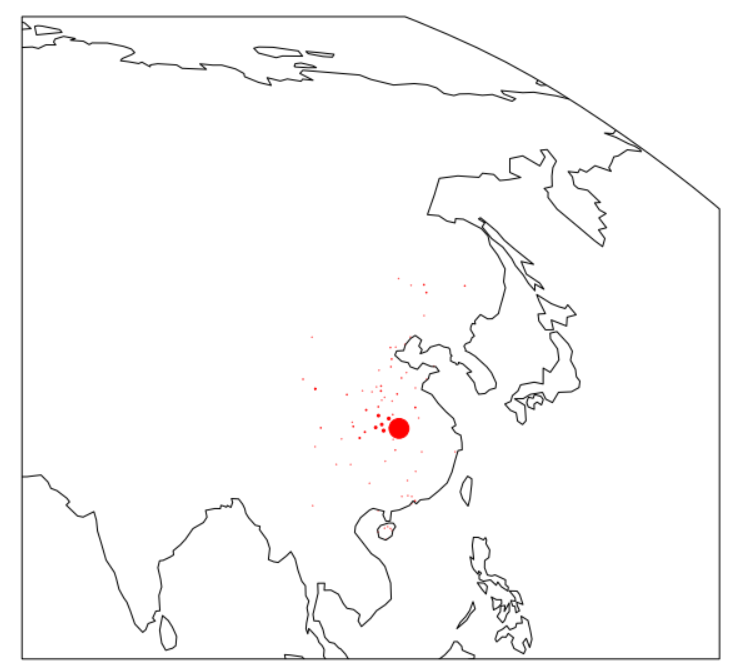

In [0]:
Image("dead_count.png")

###**Step 4: Machine Learning**

We attempted to use linear regression to predict death counts, based on confirmed and/or cured count.

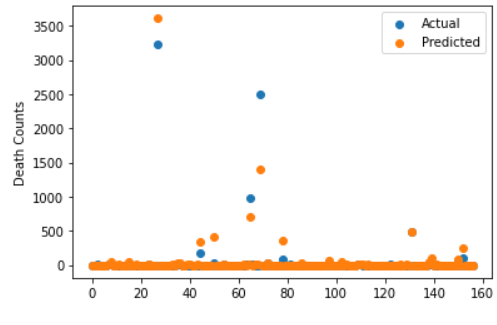

In [0]:
Image("linear_scatter.png")

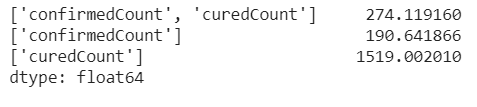

In [0]:
Image("linear_mse.png")

When using Random Forest, the results look closer to what we would expect, with lower values of estimators yielding better MSE/RMSE score. We hypertuned the n_estimators for Random Forest to find the lowest MSE.

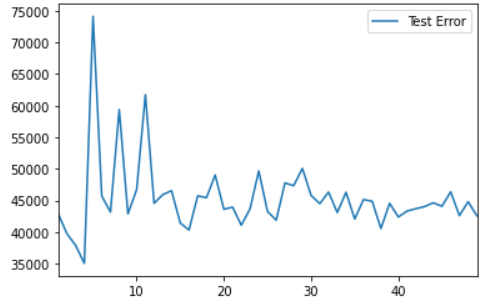

In [0]:
Image("RF_k.png")

Here we looked at the death count timeseries for US and Hubei and will forecast future death count in both US using Hubei data as training.

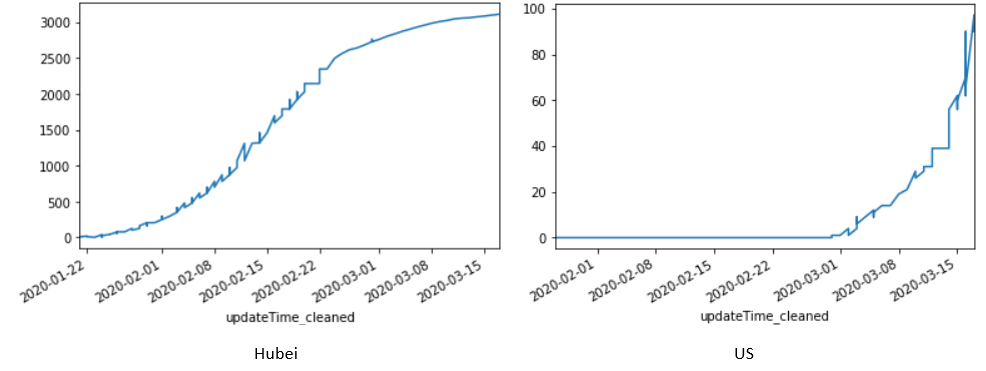

In [0]:
Image("timeseries.png")

Started with linear regression and then shifted to Light GBM to closely fit curve for Hubei

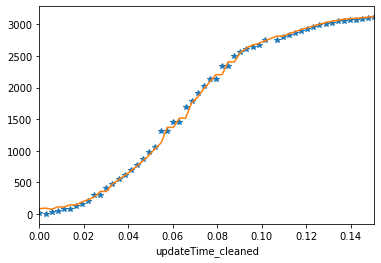

In [7]:
Image("hubei_timeseries.png")

In Hubei, the upwards curve started on the 22nd of Jan... in the US, it started on the first of March. Use the loose trend that we got from Hubei to predict what would happen to death rates in the future for the US

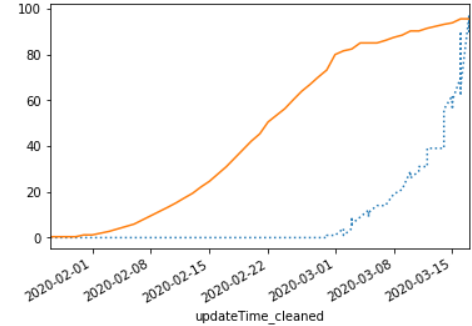

In [0]:
Image("timeseries_us.png")

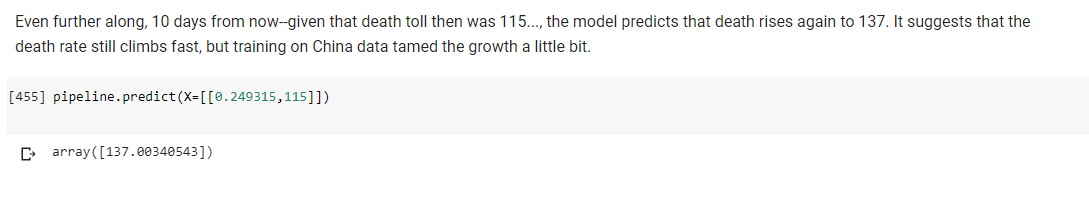

In [9]:
Image("death_toll_pred.PNG")